Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter
import glob
import os 

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Dark2")

In [2]:
data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/AT2020oi_cut_030121_noUV_BB_RphotTphot.csv")

In [3]:
data.columns

Index(['time (rest frame MJD from discovery)', 'Rphot min (cm)',
       'Rphot max (cm)', 'Rphot median (cm)', 'Tphot min (K)', 'Tphot max (K)',
       'Tphot median (K)'],
      dtype='object')

In [4]:
peakMJD = data.loc[data['Rphot median (cm)']==np.nanmax(data['Rphot median (cm)']), 'time (rest frame MJD from discovery)'].values[0]

In [5]:
rise = data.loc[data['time (rest frame MJD from discovery)'] < peakMJD]
rise = rise[rise['time (rest frame MJD from discovery)'] > 0]

In [6]:
t0 = rise['time (rest frame MJD from discovery)'].values[0]

In [7]:
t_sec = (rise['time (rest frame MJD from discovery)'].values)*24*3600
r_cm = rise['Rphot median (cm)'].values
m, b = np.polyfit(rise['time (rest frame MJD from discovery)'].values, r_cm, 1)

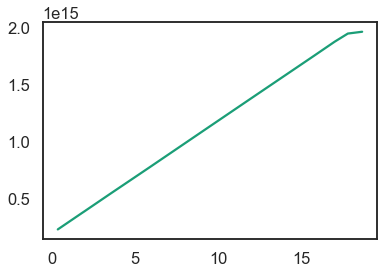

In [8]:
plt.plot(rise['time (rest frame MJD from discovery)'].values, r_cm)

In [9]:
m

98372104033573.58

In [10]:
#t=8 days
#TBB= 9679 K.
#t = 10days
#s TBB= 9230 K
#t = 16 days
#s TBB= 7690 K
#t = 19 days 
#TBB= 6999 K.
# t = 20 days
#TBB= 6774 K 
#t = 24 days
#TBB= 6383 K
# t = 38 days
#TBB= 6129 K
#from https://academic.oup.com/mnras/article/369/4/1939/1094448

time_94I = [8, 10, 16, 19, 20, 24, 38] #time in days since explosion
T_94I = [9679, 9230, 7690, 6999, 6774, 6383, 6129] #temperature of the blackbody photosphere in K

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


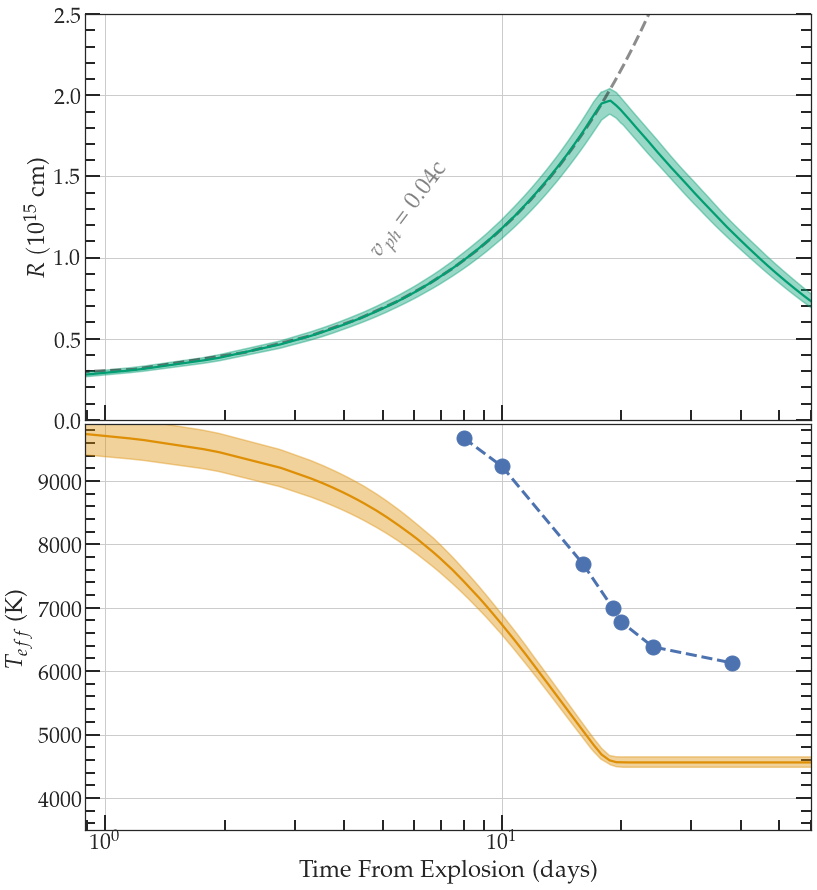

In [15]:
t0 = 58854.2

sns.set_context("poster")
sns.set(font_scale=2)
sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
#plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

xnew = np.linspace(-2, 50)

def t0_to_mjd(x):
    return x + t0

def mjd_to_t0(x):
    return x - t0

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(13,15),sharex=True)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.01)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
    
xmax = 60
ax1.text(4.6, 1., r"$v_{ph}$ = %.2fc"%(m/(3600*24)/2.998e10), color='gray', rotation=53, style='italic')
ax1.set_xscale("log")
ax1.grid(True)
ax2.grid(True)
ax1.set_ylim((0.0, 2.5))
ax2.set_xlim((0, xmax))
ax2.set_ylim((3500, 9900))
#ax1.set_ylim(ymax=4.0)

#absMJD = ax1.secondary_xaxis('top', functions=(t0_to_mjd, mjd_to_t0))
#absMJD.set_xlabel('Time (MJD)')

    
#absMJD.set_xlim((0+t0,xmax+t0))
ax1.plot(xnew, (m*(xnew)+b)/1.e15, 'k--', alpha=0.5, lw=3)
ax2.set_xlabel("Time From Explosion (days)")
ax1.set_ylabel(r"$R \ (10^{15}$ cm)");
ax2.set_ylabel(r"$T_{eff}$ (K)");
sns.set_context("talk")
ax1.plot(data['time (rest frame MJD from discovery)'], data['Rphot median (cm)']/1.e15, c=sns.color_palette("colorblind")[2])
ax1.fill_between(data['time (rest frame MJD from discovery)'], data['Rphot min (cm)']/1.e15, data['Rphot max (cm)']/1.e15, alpha=0.4, color=sns.color_palette("colorblind")[2])
ax2.plot(data['time (rest frame MJD from discovery)'], data['Tphot median (K)'], c=sns.color_palette("colorblind")[1])
ax2.fill_between(data['time (rest frame MJD from discovery)'], data['Tphot min (K)'], data['Tphot max (K)'], alpha=0.4, color=sns.color_palette("colorblind")[1])
#ax2.text(26, 6400, "SN 1994I", color='tab:blue',rotation=-5,fontsize=26, style='italic')
plt.plot(time_94I, T_94I, 'o--', ms=15, lw=3)
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/PhotoFits_MOSFiT_FancyFont.png",dpi=200, bbox_inches='tight')